# 00 Post process using class

Based on tools and scripts provided by Michael Brazell and Lawrence Cheung

Utilize the abl_stats class to carry out post processing

See https://github.com/Exawind/amr-wind-frontend/blob/main/docs/casestudies/SWIFT/Postprocessing.ipynb

In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import netCDF4 as ncdf
import pandas as pd
import os

In [2]:
from moa_python.post_abl_stats import Post_abl_stats
from moa_python.post_plane import Post_plane

## Case 004

In [10]:
case_folder = '/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_8ms/precursor'

abl_stats_file = 'post_processing/abl_statistics00000.nc'
hor_plane_file = 'post_processing/samplingPlane00000.nc'

if isinstance(case_folder,list):
    full_filename_abl_stats = []
    full_filename_hor_plane = []
    for n in range(len(case_folder)):
        full_filename_abl_stats = np.append(full_filename_abl_stats, os.path.join(case_folder[n],abl_stats_file ))
        full_filename_hor_plane = np.append(full_filename_hor_plane, os.path.join(case_folder[n],hor_plane_file ))
else:
    full_filename_abl_stats = [os.path.join(case_folder,abl_stats_file )]
    full_filename_hor_plane = [os.path.join(case_folder,hor_plane_file )]
    
abl = Post_abl_stats(full_filename_abl_stats)

Object is composed of 1 and time runs from 0.5 to 10800.0
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: AMR-Wind ABL statistics output
    version: e0ffbb62eb60-dirty
    created_on: Wed Jul 12 13:07:43 2023

    dimensions(sizes): num_time_steps(21600), ndim(3)
    variables(dimensions): float64 time(num_time_steps), float64 Q(num_time_steps), float64 Tsurf(num_time_steps), float64 ustar(num_time_steps), float64 wstar(num_time_steps), float64 L(num_time_steps), float64 zi(num_time_steps), float64 abl_forcing_x(num_time_steps), float64 abl_forcing_y(num_time_steps)
    groups: mean_profiles


In [11]:
settling_time = 7200
height = 150

Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]
Nearest height to 150 is [145.]


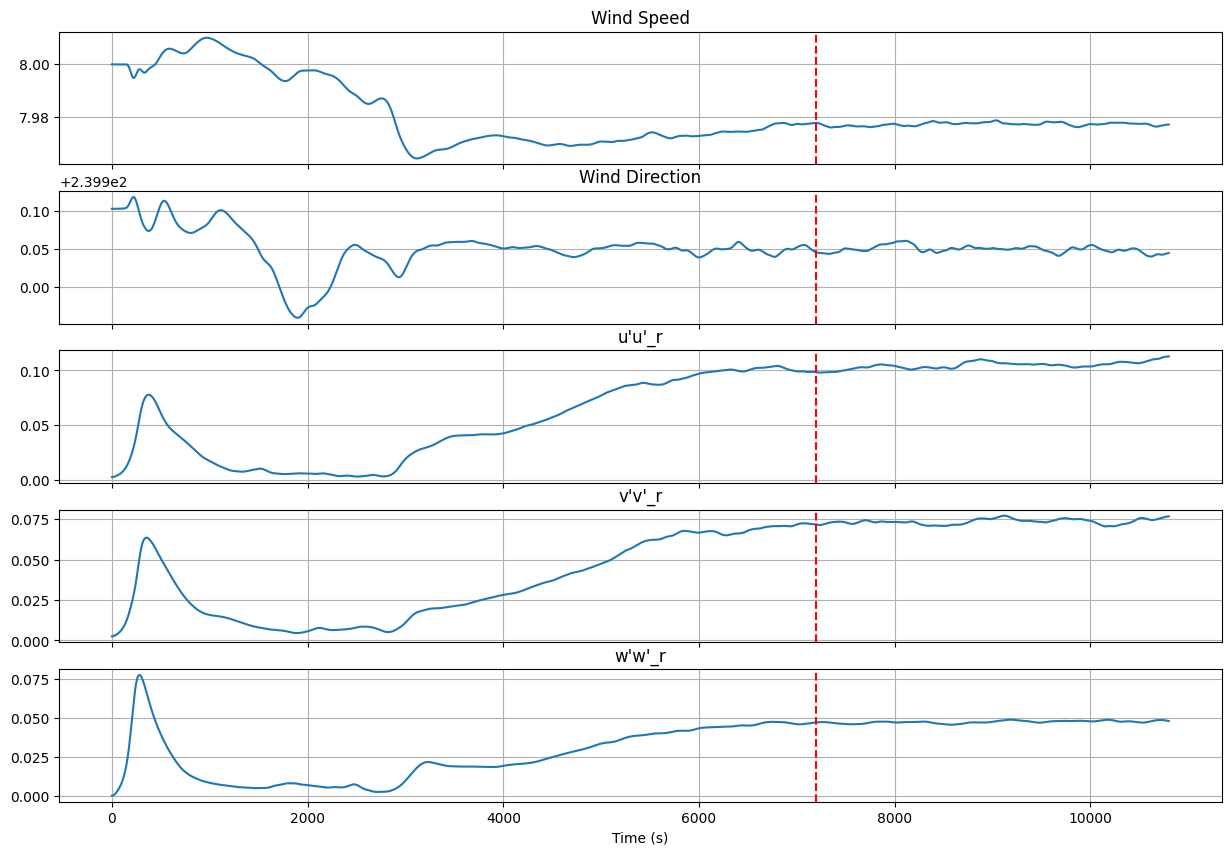

In [13]:
abl.plot_wind_measurements_at_height(height, settling_time=settling_time)

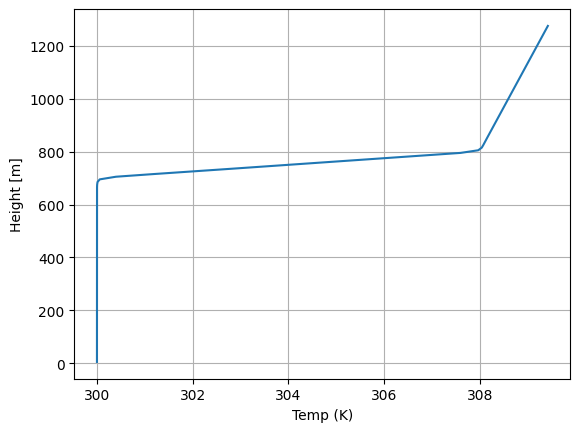

In [14]:
abl.plot_vertical_temp_profile(t_min=settling_time)

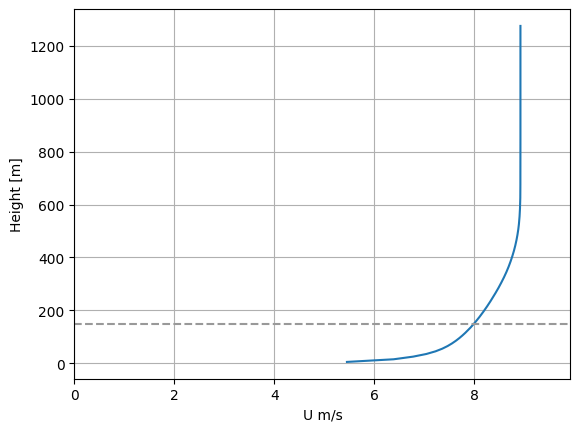

In [8]:
abl.plot_vertical_vel_profile(t_min=settling_time, height=height)

In [ ]:
TI = abl.get_turbulence_intensity_at_height(height, t_min=settling_time)

print('Turbulence Intensity [%]: ', TI)

In [ ]:
abl.plot_turbulence_intensity_profile(t_min=settling_time)

In [ ]:
hor_plane = []
Nfiles = len(full_filename_hor_plane)
for n in range(Nfiles):
    hor_plane.append(Post_plane(full_filename_hor_plane[n],100))

In [ ]:
for n in range(Nfiles):
    hor_plane[n].plot_plane(height,settling_time, vmin=5., vmax=11.)

In [ ]:
for n in range(Nfiles):
    hor_plane[n].plot_mean_plane(height, vmin=5., vmax=11.)

## Case 004 Restart

In [ ]:
case_folder = '/projects/ssc/jfrederi/precursors-amr-wind/neutral_lowti_8ms/restarts/baseline'
settling_time = settling_time + 0.5

In [ ]:
abl_stats_file = 'post_processing/abl_statistics14400.nc'
hor_plane_file = 'post_processing/samplingPlane14400.nc'

full_filename_abl_stats = os.path.join(case_folder,abl_stats_file )
full_filename_hor_plane = os.path.join(case_folder,hor_plane_file )
abl_restart = Post_abl_stats([full_filename_abl_stats])

In [ ]:
fig, axarr = plt.subplots(5,1,figsize=(9.5,8), sharex=True, tight_layout=True)
abl.plot_wind_measurements_at_height(height, settling_time=settling_time, axarr=axarr, label='Precursor')
abl_restart.plot_wind_measurements_at_height(height, settling_time=settling_time, axarr=axarr, label='Restart')
fig = plt.gcf


In [ ]:
abl.plot_vertical_temp_profile(t_min=settling_time)

In [ ]:
abl.plot_vertical_vel_profile(t_min=settling_time)

In [ ]:
hor_plane = Post_plane(full_filename_hor_plane)

In [ ]:
hor_plane.plot_plane(height,9000, vmin=5., vmax=11.)

In [ ]:
hor_plane.plot_mean_plane(height, vmin=5., vmax=11.)

### Case 005

In [ ]:
case_folder = '/scratch/pfleming/c2c/005_abl_neutral_lowTI_redo'


abl_stats_file = 'post_processing/abl_statistics00000.nc'
hor_plane_file = 'post_processing/samplingPlane00000.nc'

full_filename_abl_stats = os.path.join(case_folder,abl_stats_file )
full_filename_hor_plane = os.path.join(case_folder,hor_plane_file )
abl = Post_abl_stats([full_filename_abl_stats])

In [ ]:
abl.plot_wind_measurements_at_height(height, settling_time=settling_time)

In [ ]:
abl.plot_vertical_temp_profile(t_min=settling_time)

In [ ]:
abl.plot_vertical_vel_profile(t_min=settling_time)

In [ ]:
hor_plane = Post_hor_plane(full_filename_hor_plane)

In [ ]:
hor_plane.plot_plane(height,settling_time, vmin=5., vmax=11.)

In [ ]:
hor_plane.plot_mean_plane(height, vmin=5., vmax=11.)